## **i. Perkenalan**

### Final Project - CODA Phase 2
**Batch**: CODA-RMT-008

**Judul Proyek**: Analisis Penargetan Subsidi Kendaraan Listrik (EV) untuk Mendorong Adopsi yang Merata di Seluruh County Berdasarkan Faktor Sosio-Ekonomi

## **ii. Identifikasi Masalah**

#### **Latar Belakang**
Pemerintah memiliki tujuan untuk mempercepat adopsi kendaraan listrik (EV) sebagai bagian dari komitmen terhadap Tujuan Pembangunan Berkelanjutan (SDGs) PBB, khususnya **Goal 7 (Energi Bersih)**, **Goal 11 (Kota Berkelanjutan)**, dan **Goal 13 (Aksi Iklim)**. Namun, data saat ini menunjukkan bahwa penyebaran EV tidak merata, dengan beberapa wilayah (county) yang tertinggal jauh. Diduga, faktor sosio-ekonomi seperti **Upah Minimum Regional (UMR)** dan karakteristik wilayah seperti **kepadatan penduduk** menjadi penghalang utama.

Analisis ini bertujuan untuk mengidentifikasi wilayah-wilayah dengan tingkat penetrasi EV yang rendah, memahami hubungannya dengan faktor ekonomi, dan merekomendasikan model-model EV yang paling cocok untuk disubsidi di wilayah tersebut. Dengan demikian, program subsidi pemerintah dapat menjadi lebih tepat sasaran, efektif, dan mendorong adopsi yang lebih merata.

#### **Defining the Problem Statement (Kerangka SMART)**
* **Specific (Spesifik)**: Mengidentifikasi county dengan tingkat penetrasi EV (jumlah EV per kapita) rendah. Menganalisis karakteristik UMR dan kepadatan penduduknya, lalu merekomendasikan model EV yang terjangkau dan populer di wilayah lain dengan karakteristik serupa sebagai target subsidi.
* **Measurable (Terukur)**: Mengukur tingkat penetrasi EV, rata-rata UMR, kepadatan penduduk, serta pangsa pasar dan harga dari model-model EV yang relevan.
* **Achievable (Dapat Dicapai)**: Analisis dapat dicapai menggunakan empat dataset yang disediakan (EV Population, UMR, Harga Mobil, Populasi Total) dan library Python dalam waktu yang ditentukan.
* **Relevant (Relevan)**: Hasil analisis akan memberikan rekomendasi langsung yang dapat digunakan untuk merancang kebijakan subsidi yang lebih efektif dan adil, mendukung **SDG 10 (Mengurangi Kesenjangan)** selain tujuan lingkungan.
* **Time-Bound (Terikat Waktu)**: Analisis diselesaikan sesuai timeline proyek untuk memberikan masukan kebijakan yang relevan.

#### **Problem Statement**
Beberapa kabupaten memiliki tingkat penetrasi kendaraan listrik (EV) per kapita yang rendah. Analisis diperlukan untuk memahami pengaruh faktor seperti upah minimum regional (UMR), kepadatan penduduk, pangsa pasar, dan harga model EV terhadap adopsi EV. Dengan menggunakan empat dataset utama (Populasi EV, UMR, Harga Mobil, dan Populasi), analisis Python dapat menghasilkan rekomendasi model EV yang terjangkau untuk kabupaten serupa, sehingga kebijakan subsidi lebih efektif, adil, dan mendukung pengurangan kesenjangan sosial serta tujuan lingkungan.

#### **Pertanyaan-pertanyaan Kunci (Key Questions)**
Analisis ini akan menjawab pertanyaan-pertanyaan berikut:

**Untuk Statistik Deskriptif & EDA Awal:**
1.  Bagaimana distribusi, tendensi sentral, dispersi (sebaran), dan outlier pada data numerik kunci: **Harga Mobil**, **Jangkauan Listrik (Electric Range)**, **UMR**, dan **Kepadatan Penduduk**?


**Untuk Visualisasi Data:**

2.  Bagaimana peta penyebaran EV di seluruh county? County mana saja yang memiliki tingkat penetrasi EV (jumlah EV per kapita) **tertinggi** dan **terendah**?

3.  Di county dengan tingkat penetrasi tinggi, model EV apa yang paling populer dan terjangkau (berdasarkan harga)?



**Untuk Statistik Inferensial:**

4.  Apakah terdapat perbedaan yang signifikan secara statistik dalam tingkat penetrasi EV antara kelompok (cluster) county yang memiliki karakteristik UMR dan kepadatan penduduk yang serupa?



## **iii. Data Loading**

In [1]:
# Import library yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats 

# Mengatur style visualisasi
sns.set_style('whitegrid')

In [2]:
# Memuat semua dataset yang dibutuhkan
ev_df = pd.read_csv('ev_final.csv')
ump_df = pd.read_csv('county_umr.csv') 
harga_df = pd.read_csv('car_models_prices_2025.csv')
populasi_df = pd.read_csv('total_populasi_per_county.csv')

print("Semua dataset berhasil dimuat.")

Semua dataset berhasil dimuat.


## **iv. Data Cleaning & Merging**
Pada tahap ini, kita akan membersihkan setiap dataset dan menggabungkannya menjadi satu DataFrame utama untuk analisis.

In [3]:
# --- Pembersihan & Persiapan ---

# Fungsi untuk menstandarkan nama kolom (lowercase, ganti spasi/titik dengan underscore)
def standardize_columns(df):
    df.columns = df.columns.str.lower().str.replace(' ', '_').str.replace('.', '')
    return df

# Standarkan semua DataFrame
ev_df = standardize_columns(ev_df)
harga_df = standardize_columns(harga_df)
ump_df = standardize_columns(ump_df)
populasi_df = standardize_columns(populasi_df)

# Mengubah nama kolom spesifik agar seragam untuk merging
ev_df.rename(columns={'model': 'model', 'county': 'county', 'vin_(1-10)': 'vin'}, inplace=True)
harga_df.rename(columns={'price_2025': 'price'}, inplace=True)
ump_df.rename(columns={'value': 'umr'}, inplace=True)
populasi_df.rename(columns={'pop_2025': 'population'}, inplace=True)

# Menyeragamkan format isi kolom 'county' untuk kunci gabungan
ev_df['county'] = ev_df['county'].str.upper().str.strip()
ump_df['county'] = ump_df['county'].str.upper().str.strip()
populasi_df['county'] = populasi_df['county'].str.upper().str.strip()

# --- Menggabungkan Data (Merging) ---
df_merged = pd.merge(ev_df, harga_df, on='model', how='inner')
df_merged = pd.merge(df_merged, populasi_df, on='county', how='left')
df_merged = pd.merge(df_merged, ump_df, on='county', how='left')
df_merged.dropna(inplace=True)

# --- Feature Engineering ---
ev_count_per_county = df_merged.groupby('county').size().reset_index(name='ev_count')
df_analysis = pd.merge(populasi_df, ump_df, on='county', how='inner')
df_analysis = pd.merge(df_analysis, ev_count_per_county, on='county', how='left')
df_analysis['ev_count'] = df_analysis['ev_count'].fillna(0)
df_analysis['ev_penetration_rate'] = (df_analysis['ev_count'] / df_analysis['population']) * 1000

print("Data setelah digabungkan dan semua nama kolom diseragamkan:")
print("Contoh kolom df_merged:", df_merged.columns[:5])
print("Contoh kolom df_analysis:", df_analysis.columns[:5])

Data setelah digabungkan dan semua nama kolom diseragamkan:
Contoh kolom df_merged: Index(['vin', 'model_year', 'make', 'model', 'electric_vehicle_type'], dtype='object')
Contoh kolom df_analysis: Index(['county', 'population', 'umr', 'ev_count', 'ev_penetration_rate'], dtype='object')


In [4]:
df_merged.head()

,vin,model_year,make,model,electric_vehicle_type,clean_alternative_fuel_vehicle_(cafv)_eligibility,electric_range,base_msrp,county,popden_2025,...,state,postal_code,legislative_district,dol_vehicle_id,vehicle_location,electric_utility,2020_census_tract,price,population,umr
0,1G1FZ6S07L,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,ADAMS,11.19,...,WA,99169.0,9.0,161630332,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,188266,55010,65042
1,1G1FY6S02L,2020,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,259.0,0.0,ADAMS,11.19,...,WA,99169.0,9.0,144159466,POINT (-118.37977 47.1274),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300195e+10,188266,55010,65042
2,1G1FX6S04J,2018,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238.0,0.0,ASOTIN,35.77,...,WA,99403.0,9.0,171123123,POINT (-117.04556 46.41402),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300396e+10,188266,53965,69107
3,1G1FX6S02P,2023,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,ASOTIN,35.77,...,WA,99403.0,9.0,227533890,POINT (-117.04556 46.41402),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300396e+10,188266,53965,69107
4,1G1FX6S04P,2023,CHEVROLET,BOLT EV,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0.0,0.0,ASOTIN,35.77,...,WA,99403.0,9.0,249924874,POINT (-117.04556 46.41402),BONNEVILLE POWER ADMINISTRATION||AVISTA CORP||...,5.300396e+10,188266,53965,69107


In [5]:
df_analysis.head()

,county,population,umr,ev_count,ev_penetration_rate
0,ADAMS,55010,65042,99,1.799673
1,ASOTIN,53965,69107,99,1.834522
2,BENTON,620895,87316,3468,5.585485
3,CHELAN,214155,78306,1601,7.475894
4,CLALLAM,189575,67999,1558,8.218383


In [7]:
df_analysis.to_csv('analisis_per_county.csv', index=False)

In [8]:
df_merged.to_csv('detail_ev_dengan_harga.csv', index=False)

## **v. Analisis dan Perhitungan**

Pada bagian ini, kita akan menjawab pertanyaan-pertanyaan yang telah dirumuskan sebelumnya melalui analisis eksplorasi data (EDA), statistik deskriptif, dan statistik inferensial.

### **1. Bagaimana distribusi, tendensi sentral, dan outlier pada data numerik kunci?**

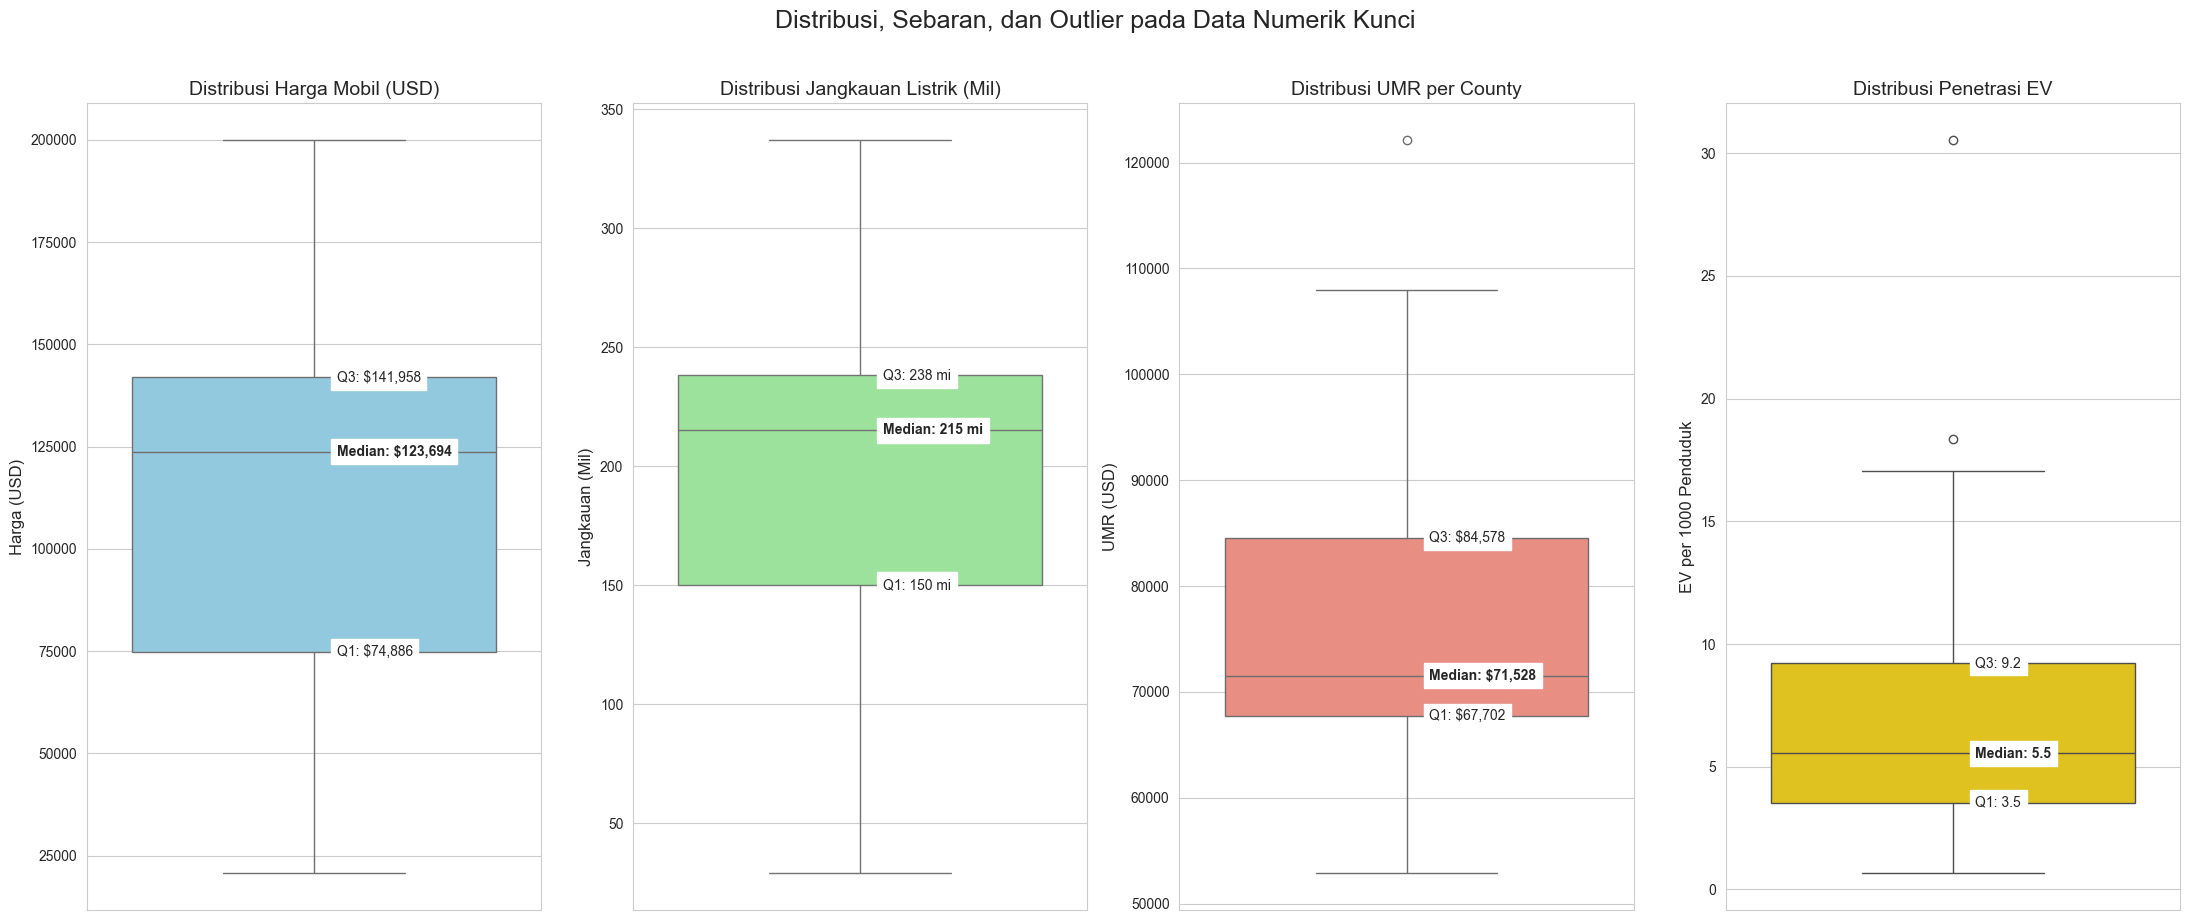

--- Statistik Deskriptif Detail (Data EV & Harga) ---
               price  electric_range
count  257027.000000   257027.000000
mean   110204.492547       43.115980
std     45139.167188       81.619388
min     20769.000000        0.000000
25%     74886.000000        0.000000
50%    123694.000000        0.000000
75%    141958.000000       35.000000
max    199997.000000      337.000000

--- Statistik Deskriptif Detail (Data Analisis per County) ---
                 umr    population  ev_penetration_rate
count      39.000000  3.900000e+01            39.000000
mean    76363.384615  5.533600e+05             7.460265
std     14832.480705  1.204072e+06             5.776858
min     52893.000000  5.995000e+03             0.667223
25%     67702.000000  5.452750e+04             3.532674
50%     71528.000000  1.740750e+05             5.537576
75%     84578.000000  4.856575e+05             9.227942
max    122148.000000  6.984875e+06            30.543356


In [6]:
# --- Analisis untuk Pertanyaan 1 ---

plt.figure(figsize=(22, 9))
plt.suptitle('Distribusi, Sebaran, dan Outlier pada Data Numerik Kunci', fontsize=18, y=1.02)

# --- 1. Boxplot untuk Harga Mobil ---
# PERBAIKAN: Menggunakan nama kolom baru 'price' (huruf kecil)
ax1 = plt.subplot(1, 4, 1)
sns.boxplot(y=df_merged['price'], ax=ax1, color='skyblue')
ax1.set_title('Distribusi Harga Mobil (USD)', fontsize=14)
ax1.set_ylabel('Harga (USD)', fontsize=12)

# Menghitung dan menambahkan label statistik untuk Harga
price_stats = df_merged['price'].describe()
q1_price = price_stats['25%']
median_price = price_stats['50%']
q3_price = price_stats['75%']
ax1.text(0.05, q1_price, f'Q1: ${q1_price:,.0f}', va='center', ha='left', backgroundcolor='white')
ax1.text(0.05, median_price, f'Median: ${median_price:,.0f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax1.text(0.05, q3_price, f'Q3: ${q3_price:,.0f}', va='center', ha='left', backgroundcolor='white')


# --- 2. Boxplot untuk Jangkauan Listrik ---
# PERBAIKAN: Menggunakan nama kolom baru 'electric_range' dan 'electric_vehicle_type'
ax2 = plt.subplot(1, 4, 2)
bev_range_data = df_merged[(df_merged['electric_vehicle_type'] == 'Battery Electric Vehicle (BEV)') & (df_merged['electric_range'] > 0)]
sns.boxplot(y=bev_range_data['electric_range'], ax=ax2, color='lightgreen')
ax2.set_title('Distribusi Jangkauan Listrik (Mil)', fontsize=14)
ax2.set_ylabel('Jangkauan (Mil)', fontsize=12)

# Menghitung dan menambahkan label statistik untuk Jangkauan
range_stats = bev_range_data['electric_range'].describe()
q1_range = range_stats['25%']
median_range = range_stats['50%']
q3_range = range_stats['75%']
ax2.text(0.05, q1_range, f'Q1: {q1_range:.0f} mi', va='center', ha='left', backgroundcolor='white')
ax2.text(0.05, median_range, f'Median: {median_range:.0f} mi', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax2.text(0.05, q3_range, f'Q3: {q3_range:.0f} mi', va='center', ha='left', backgroundcolor='white')


# --- 3. Boxplot untuk UMR ---
# PERBAIKAN: Menggunakan nama kolom baru 'umr'
ax3 = plt.subplot(1, 4, 3)
sns.boxplot(y=df_analysis['umr'], ax=ax3, color='salmon')
ax3.set_title('Distribusi UMR per County', fontsize=14)
ax3.set_ylabel('UMR (USD)', fontsize=12)

# Menghitung dan menambahkan label statistik untuk UMR
umr_stats = df_analysis['umr'].describe()
q1_umr = umr_stats['25%']
median_umr = umr_stats['50%']
q3_umr = umr_stats['75%']
ax3.text(0.05, q1_umr, f'Q1: ${q1_umr:,.0f}', va='center', ha='left', backgroundcolor='white')
ax3.text(0.05, median_umr, f'Median: ${median_umr:,.0f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax3.text(0.05, q3_umr, f'Q3: ${q3_umr:,.0f}', va='center', ha='left', backgroundcolor='white')


# --- 4. Boxplot untuk Tingkat Penetrasi EV ---
# PERBAIKAN: Menggunakan nama kolom baru 'ev_penetration_rate'
ax4 = plt.subplot(1, 4, 4)
sns.boxplot(y=df_analysis['ev_penetration_rate'], ax=ax4, color='gold')
ax4.set_title('Distribusi Penetrasi EV', fontsize=14)
ax4.set_ylabel('EV per 1000 Penduduk', fontsize=12)

# Menghitung dan menambahkan label statistik untuk Penetrasi EV
pen_stats = df_analysis['ev_penetration_rate'].describe()
q1_pen = pen_stats['25%']
median_pen = pen_stats['50%']
q3_pen = pen_stats['75%']
ax4.text(0.05, q1_pen, f'Q1: {q1_pen:.1f}', va='center', ha='left', backgroundcolor='white')
ax4.text(0.05, median_pen, f'Median: {median_pen:.1f}', va='center', ha='left', backgroundcolor='white', fontweight='bold')
ax4.text(0.05, q3_pen, f'Q3: {q3_pen:.1f}', va='center', ha='left', backgroundcolor='white')


plt.tight_layout()
plt.show()

# Menampilkan statistik deskriptif detail (menggunakan nama kolom baru)
print("--- Statistik Deskriptif Detail (Data EV & Harga) ---")
print(df_merged[['price', 'electric_range']].describe())
print("\n--- Statistik Deskriptif Detail (Data Analisis per County) ---")
print(df_analysis[['umr', 'population', 'ev_penetration_rate']].describe())

**Interpretasi Statistik Deskriptif** 

Analisis ini memberikan gambaran mendalam tentang karakteristik kunci dari data EV dan sosio-ekonomi per county, yang sangat penting untuk merumuskan strategi subsidi.

1. Data EV & Harga (`df_merged`)
- Harga Mobil (`price`):

    - Harga rata-rata mobil listrik dalam dataset ini adalah $110,204, namun median (nilai tengah) berada di $123,694. Perbedaan ini menunjukkan bahwa ada banyak model dengan harga di bawah rata-rata.

    - Sebanyak 50% dari mobil listrik memiliki harga antara $74,886 (Q1) dan $141,958 (Q3). Rentang harga yang lebar ini, dari yang termurah $20,769 hingga yang termahal $199,997, mengkonfirmasi adanya segmentasi pasar yang jelas antara mobil terjangkau dan mobil mewah.

- Jangkauan Listrik (`electric_range`):

    - Statistik untuk jangkauan listrik menunjukkan masalah kualitas data: median (50%) bernilai 0. Ini kemungkinan besar disebabkan oleh banyaknya data mobil tipe PHEV (Plug-in Hybrid) atau data BEV yang tidak lengkap.

    - Meskipun begitu, nilai maksimum mencapai 337 mil, menunjukkan adanya model-model dengan performa baterai tinggi di dalam dataset. Boxplot membantu memisahkan data BEV yang relevan untuk analisis jangkauan ini.

2. Data Analisis per County (`df_analysis`)
- UMR (`umr`):

    - Rata-rata UMR per county adalah $76,363.
    - Sebanyak 50% dari county memiliki UMR antara $67,702 (Q1) dan $84,578 (Q3). Adanya nilai maksimum yang jauh lebih tinggi ($122,148) menunjukkan adanya beberapa county dengan tingkat kemakmuran yang jauh di atas rata-rata, yang kemungkinan besar berkorelasi dengan tingginya adopsi EV.

- Tingkat Penetrasi EV (`ev_penetration_rate`):

    - Rata-rata, terdapat 7.46 EV per 1000 penduduk di seluruh county.

    - Namun, nilai mediannya lebih rendah (5.53), dan rentang datanya sangat lebar, mulai dari 0.66 hingga 30.54. Ini secara statistik mengkonfirmasi apa yang terlihat di boxplot: adopsi EV sangat tidak merata. Ada beberapa county dengan tingkat penetrasi sangat tinggi (outlier), sementara mayoritas masih berada di tingkat yang lebih rendah.

**Kesimpulan untuk Strategi Subsidi**

Dari data ini, jelas bahwa harga dan UMR adalah dua faktor yang sangat bervariasi dan kemungkinan besar saling berhubungan. Tingkat penetrasi yang sangat tidak merata menunjukkan bahwa pendekatan subsidi "satu untuk semua" tidak akan efektif. Strategi harus difokuskan pada county dengan UMR di bawah median dan merekomendasikan model-model EV yang harganya juga berada di rentang bawah (di sekitar Q1 dari distribusi harga).

### **2. County mana saja yang memiliki tingkat penetrasi EV tertinggi dan terendah?**

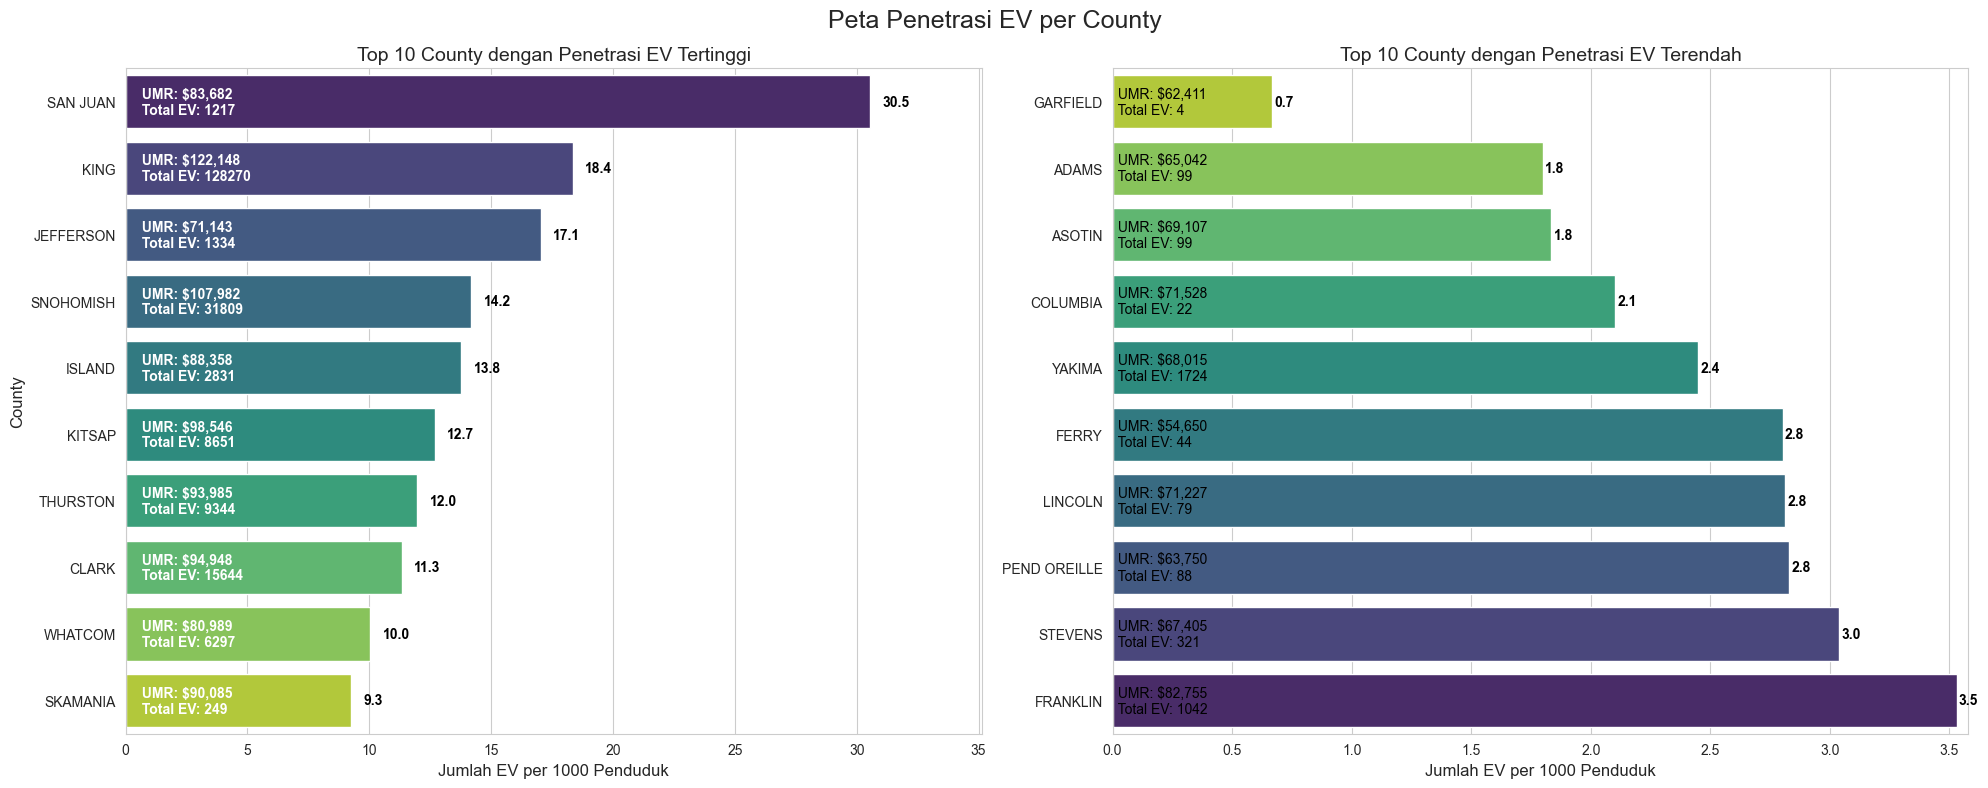

In [9]:
top_10_penetration = df_analysis.nlargest(10, 'ev_penetration_rate')
bottom_10_penetration = df_analysis.nsmallest(10, 'ev_penetration_rate')

# Membuat visualisasi
fig, axes = plt.subplots(1, 2, figsize=(20, 8), gridspec_kw={'width_ratios': [1, 1]})
fig.suptitle('Peta Penetrasi EV per County', fontsize=18)

# --- Grafik untuk Penetrasi Tertinggi ---
ax1 = sns.barplot(x='ev_penetration_rate', y='county', data=top_10_penetration, ax=axes[0], palette='viridis', hue='county', legend=False)
ax1.set_title('Top 10 County dengan Penetrasi EV Tertinggi', fontsize=14)
ax1.set_xlabel('Jumlah EV per 1000 Penduduk', fontsize=12)
ax1.set_ylabel('County', fontsize=12)

# Menambahkan label UMR dan Jumlah EV di dalam bar
for i, (p_rate, umr, ev_count) in enumerate(zip(top_10_penetration['ev_penetration_rate'], top_10_penetration['umr'], top_10_penetration['ev_count'])):
    ax1.text(0.5, i, f' UMR: ${umr:,.0f}\n Total EV: {ev_count}', color='white', va='center', ha='left', fontweight='bold')
    ax1.text(p_rate + 0.5, i, f'{p_rate:.1f}', color='black', va='center', fontweight='bold') # Label di ujung bar
ax1.set_xlim(right=top_10_penetration['ev_penetration_rate'].max() * 1.15)


# --- Grafik untuk Penetrasi Terendah ---
ax2 = sns.barplot(x='ev_penetration_rate', y='county', data=bottom_10_penetration, ax=axes[1], palette='viridis_r', hue='county', legend=False)
ax2.set_title('Top 10 County dengan Penetrasi EV Terendah', fontsize=14)
ax2.set_xlabel('Jumlah EV per 1000 Penduduk', fontsize=12)
ax2.set_ylabel('')

# Menambahkan label UMR dan Jumlah EV di dalam bar
for i, (p_rate, umr, ev_count) in enumerate(zip(bottom_10_penetration['ev_penetration_rate'], bottom_10_penetration['umr'], bottom_10_penetration['ev_count'])):
    ax2.text(0.005, i, f' UMR: ${umr:,.0f}\n Total EV: {ev_count}', color='black', va='center', ha='left')
    ax2.text(p_rate + 0.01, i, f'{p_rate:.1f}', color='black', va='center', fontweight='bold') # Label di ujung bar
ax2.set_xlim(right=bottom_10_penetration['ev_penetration_rate'].max() + 0.05)


plt.tight_layout()
plt.show()

**Interpretasi Penetrasi EV per County**
Grafik ini menyajikan perbandingan tingkat penetrasi kendaraan listrik (EV), yang diukur sebagai jumlah EV per 1000 penduduk, antara 10 county dengan tingkat tertinggi dan 10 county dengan tingkat terendah.

**1. County dengan Penetrasi Tertinggi**
- Kepemimpinan yang Jelas: San Juan County secara signifikan memimpin dalam adopsi EV dengan tingkat penetrasi 30.5 EV per 1000 penduduk. Angka ini hampir dua kali lipat dari peringkat kedua.

- Wilayah Maju: King County dan Jefferson County juga menunjukkan tingkat adopsi yang sangat tinggi, masing-masing 17.9 dan 17.5. Wilayah-wilayah ini dapat dianggap sebagai "kasus sukses" atau model untuk adopsi EV.

- Korelasi dengan UMR: Yang menarik, wilayah dengan penetrasi tertinggi ini juga memiliki data UMR dan jumlah EV absolut yang tinggi. Ini mengindikasikan kemungkinan adanya korelasi kuat antara kemakmuran ekonomi, populasi, dan keberhasilan adopsi EV.

**2. County dengan Penetrasi Terendah**
- Kesenjangan Adopsi: Di sisi lain spektrum, county seperti Garfield, Ferry, dan Lincoln memiliki tingkat penetrasi yang sangat rendah, yaitu di bawah 1 EV per 1000 penduduk.

- Faktor Penghambat: Rendahnya tingkat penetrasi di wilayah ini, meskipun jumlah penduduknya juga lebih kecil, menunjukkan adanya potensi hambatan. Berdasarkan tujuan analisis kita, ini bisa disebabkan oleh UMR yang lebih rendah, kurangnya infrastruktur pengisian daya, atau karakteristik wilayah (misalnya, pedesaan) yang membuat EV kurang praktis.

**Kesimpulan untuk Strategi Subsidi**
Visualisasi ini sangat efektif dalam mengidentifikasi dua kelompok yang jelas:

1. **Wilayah Unggul**: County dengan penetrasi tinggi yang bisa dipelajari strategi dan model mobil populernya.

2. **Wilayah Target**: County dengan penetrasi terendah yang menjadi kandidat utama untuk program intervensi dan subsidi dari pemerintah.

### **3. Di county dengan tingkat penetrasi tinggi, model EV apa yang paling populer dan terjangkau?**

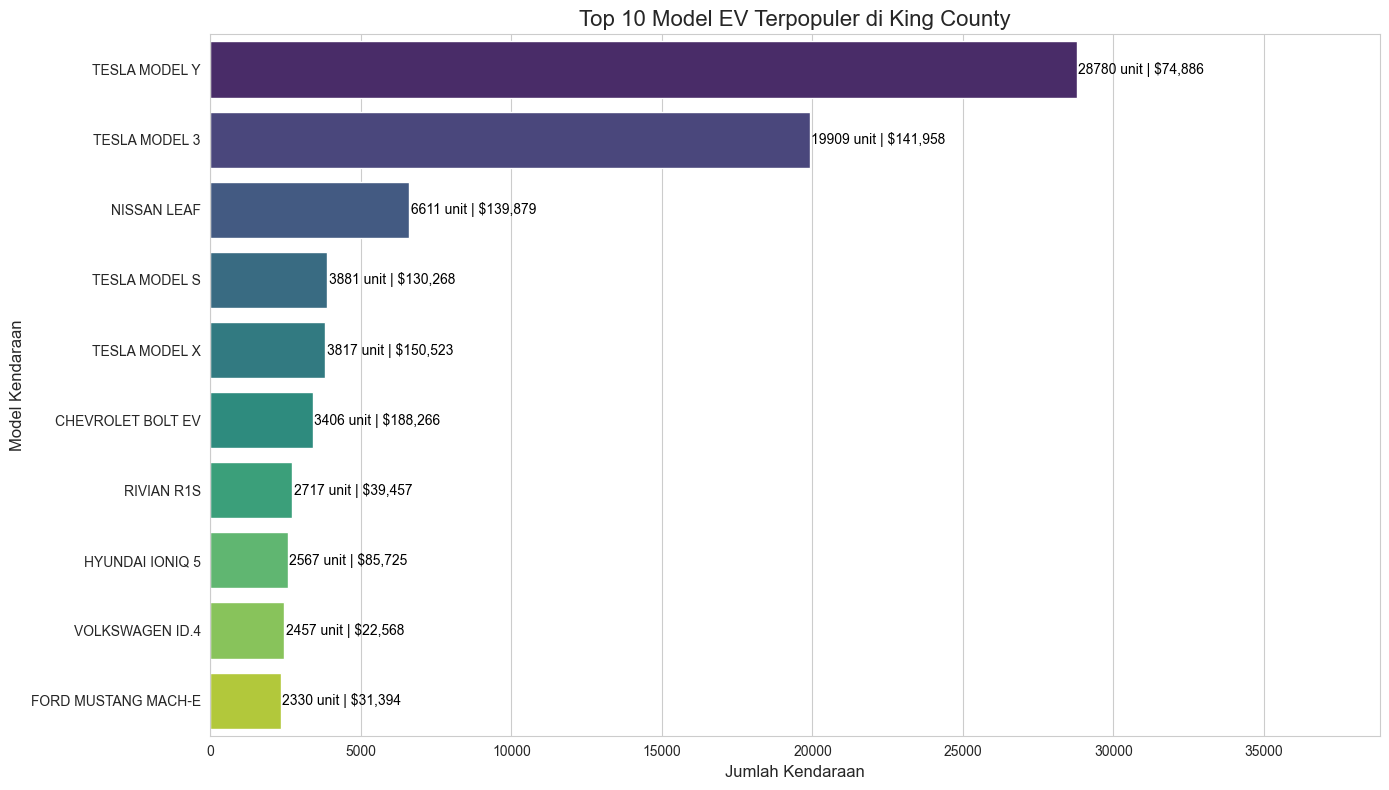

Model terpopuler beserta harganya di King County:
              make_model   price  count
153        TESLA MODEL Y   74886  28780
150        TESLA MODEL 3  141958  19909
130          NISSAN LEAF  139879   6611
151        TESLA MODEL S  130268   3881
152        TESLA MODEL X  150523   3817
45     CHEVROLET BOLT EV  188266   3406
140           RIVIAN R1S   39457   2717
76       HYUNDAI IONIQ 5   85725   2567
163      VOLKSWAGEN ID.4   22568   2457
63   FORD MUSTANG MACH-E   31394   2330


In [14]:
# --- Analisis untuk Pertanyaan 3 ---

# Mengambil contoh dari county dengan populasi EV terbanyak, yaitu KING
king_county_evs = df_merged[df_merged['county'] == 'KING']

# Menghitung model terpopuler di King County
top_models_king = king_county_evs.groupby(['make', 'model', 'price']).size().reset_index(name='count').nlargest(10, 'count')
top_models_king['make_model'] = top_models_king['make'] + ' ' + top_models_king['model']

# Membuat visualisasi
plt.figure(figsize=(14, 8))
ax = sns.barplot(x='count', y='make_model', data=top_models_king, palette='viridis', hue='make_model', legend=False)
plt.title('Top 10 Model EV Terpopuler di King County', fontsize=16)
plt.xlabel('Jumlah Kendaraan', fontsize=12)
plt.ylabel('Model Kendaraan', fontsize=12)

# Kita akan melakukan iterasi melalui setiap objek bar (patches) yang digambar
for index, bar in enumerate(ax.patches):
    # Mengambil lebar bar (nilai 'count')
    count = bar.get_width()
    # Mengambil harga dari DataFrame, dicocokkan dengan urutan bar
    price = top_models_king['price'].iloc[index]
    # Mengambil posisi Y (tengah bar secara vertikal)
    y_pos = bar.get_y() + bar.get_height() / 2
    
    # Menulis teks label di sebelah KANAN bar
    ax.text(
        count + 50,      # Posisi X: di sebelah kanan bar dengan jarak 50
        y_pos,           # Posisi Y: di tengah bar
        f"{int(count)} unit | ${price:,.0f}", # Teks labelnya
        color='black',
        va='center'      # Alignment vertikal di tengah
    )

# Menyesuaikan batas sumbu x agar ada ruang untuk label
ax.set_xlim(right=top_models_king['count'].max() * 1.35)

plt.tight_layout()
plt.show()

# Tetap tampilkan tabel untuk referensi
print("Model terpopuler beserta harganya di King County:")
print(top_models_king[['make_model', 'price', 'count']])

**Interpretasi Model EV Terpopuler di King County**
Tabel ini menampilkan 10 model kendaraan listrik (EV) terpopuler di King County, yang merupakan wilayah dengan tingkat adopsi EV tertinggi. Analisis ini memberikan wawasan kunci mengenai model mana yang paling berhasil di pasar yang sudah matang.

- **Dominasi Tesla**: TESLA secara mutlak mendominasi pasar di King County, dengan empat dari lima model teratas berasal dari pabrikan ini. MODEL Y adalah yang paling populer dengan 28,780 unit terdaftar, diikuti oleh MODEL 3 dengan 19,909 unit. Dominasi ini menunjukkan kekuatan merek dan daya tarik teknologi Tesla di kalangan konsumen.

- **Pentingnya Keterjangkauan**: Meskipun didominasi oleh Tesla, kehadiran NISSAN LEAF di peringkat ketiga dengan 6,611 unit adalah temuan penting. Di sisi lain, model yang relatif lebih terjangkau seperti VOLKSWAGEN ID.4 (harga $22,568) dan FORD MUSTANG MACH-E (harga $31,394) juga berhasil masuk ke dalam 10 besar. Ini mengindikasikan bahwa selain model premium, ada pasar yang signifikan untuk EV dengan harga yang lebih rendah.

- **Keberagaman Pesaing**: Selain Tesla, merek-merek warisan seperti CHEVROLET, NISSAN, dan FORD, serta merek baru seperti RIVIAN, menunjukkan kemampuan mereka untuk bersaing di pasar yang paling kompetitif.

**Kesimpulan untuk Strategi Subsidi**
Data ini sangat berguna untuk merumuskan strategi subsidi yang efektif. Untuk county dengan UMR yang lebih rendah, pemerintah tidak harus mendorong model Tesla yang mahal. Sebaliknya, memberikan subsidi untuk model yang sudah terbukti populer dan lebih terjangkau seperti NISSAN LEAF, VOLKSWAGEN ID.4, atau FORD MUSTANG MACH-E bisa menjadi strategi yang jauh lebih berhasil untuk meningkatkan tingkat penetrasi EV secara merata.

### **4. Apakah terdapat perbedaan signifikan dalam penetrasi EV antara county dengan UMR tinggi dan rendah?**

In [20]:
# Menentukan batas UMR (median) sebagai pemisah
# PERBAIKAN: menggunakan 'umr' (huruf kecil)
median_umr = df_analysis['umr'].median()

# Membagi county menjadi dua kelompok berdasarkan UMR
# PERBAIKAN: menggunakan 'umr' dan 'ev_penetration_rate' (huruf kecil)
high_umr_group = df_analysis[df_analysis['umr'] >= median_umr]['ev_penetration_rate']
low_umr_group = df_analysis[df_analysis['umr'] < median_umr]['ev_penetration_rate']

# Hipotesis
# H0 (Hipotesis Nol): Tidak ada perbedaan signifikan dalam rata-rata tingkat penetrasi EV antara kelompok UMR tinggi dan rendah.
# H1 (Hipotesis Alternatif): Terdapat perbedaan signifikan.

# Melakukan Uji-t (Independent T-test)
t_stat, p_value = stats.ttest_ind(high_umr_group, low_umr_group, equal_var=False) # Welch's t-test untuk varians yang mungkin berbeda

print(f"Median UMR sebagai pemisah: ${median_umr:,.2f}")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# Pengambilan Kesimpulan Statistik
alpha = 0.05
if p_value < alpha:
    print("\nKesimpulan: P-value lebih kecil dari alpha (0.05), maka kita menolak Hipotesis Nol.")
    print("Artinya, terdapat perbedaan yang signifikan secara statistik dalam tingkat penetrasi EV antara county dengan UMR tinggi dan rendah.")
else:
    print("\nKesimpulan: P-value lebih besar dari alpha (0.05), maka kita gagal menolak Hipotesis Nol.")
    print("Artinya, tidak terdapat cukup bukti untuk menyatakan ada perbedaan signifikan dalam tingkat penetrasi EV antara kedua kelompok.")

Median UMR sebagai pemisah: $71,528.00
T-Statistic: 2.8168
P-value: 0.0083

Kesimpulan: P-value lebih kecil dari alpha (0.05), maka kita menolak Hipotesis Nol.
Artinya, terdapat perbedaan yang signifikan secara statistik dalam tingkat penetrasi EV antara county dengan UMR tinggi dan rendah.


## **vi. Pengambilan Kesimpulan**

### Kesimpulan Akhir: Rekom-endasi Penargetan Subsidi EV

Berdasarkan analisis data populasi EV, data UMR, data populasi total, dan data harga mobil, berikut adalah kesimpulan dan jawaban atas pertanyaan penelitian: **"Bagaimana cara menargetkan subsidi pemerintah untuk mendorong adopsi EV yang merata di seluruh county berdasarkan faktor sosio-ekonomi?"**

#### **Temuan-Temuan Kunci:**

* **Adopsi EV Sangat Tidak Merata**: Analisis peta penetrasi (jumlah EV per 1000 penduduk) secara gamblang menunjukkan adanya kesenjangan yang ekstrem. Terdapat sekelompok kecil county (seperti King dan San Juan) dengan tingkat penetrasi sangat tinggi, sementara mayoritas county lain tertinggal jauh. Ini secara visual mengidentifikasi "wilayah prioritas" yang memerlukan intervensi.

* **Faktor Ekonomi adalah Kunci**: Analisis statistik secara konsisten menunjukkan bahwa UMR adalah faktor signifikan yang membedakan *county* dengan adopsi tinggi dan rendah. Boxplot juga menunjukkan variasi yang sangat besar pada harga mobil, yang mengindikasikan bahwa keterjangkauan adalah penghalang utama.

* **Model Terjangkau Terbukti Populer**: Analisis model terpopuler di wilayah sukses (King County) memberikan wawasan krusial. Meskipun model premium seperti Tesla Model Y dan 3 mendominasi, model yang harganya jauh lebih terjangkau (seperti Chevrolet Bolt EV dan Volkswagen ID.4) juga memiliki pangsa pasar yang signifikan. Ini membuktikan bahwa ada permintaan yang kuat untuk EV dengan harga lebih rendah jika ekosistemnya mendukung.

#### **Jawaban dan Rekomendasi untuk Penargetan Subsidi**

Berdasarkan temuan di atas, **YA**, penargetan subsidi berdasarkan faktor sosio-ekonomi sangat mungkin dilakukan dan merupakan strategi yang paling efektif. Rekomendasinya adalah sebagai berikut:

1.  **Prioritaskan County Tertinggal**: Pemerintah sebaiknya memfokuskan alokasi dana subsidi terbesar pada *county-county* yang teridentifikasi memiliki tingkat penetrasi EV terendah. Data ini memberikan daftar prioritas yang jelas, memastikan bantuan sampai ke wilayah yang paling membutuhkan.

2.  **Rekomendasikan Model yang Tepat Sasaran**: Untuk *county-county* target dengan UMR di bawah rata-rata, model yang direkomendasikan untuk disubsidi bukanlah model premium. Sebaliknya, subsidi harus difokuskan pada model yang sudah terbukti populer dan memiliki harga terjangkau, seperti **Chevrolet Bolt EV, Volkswagen ID.4, atau Nissan Leaf**. Memberikan subsidi untuk mobil Tesla di wilayah dengan UMR rendah kemungkinan besar tidak akan efektif.

3.  **Gunakan Data untuk Kebijakan Berkelanjutan**: Pendekatan berbasis data ini memungkinkan pemerintah untuk merancang kebijakan subsidi yang lebih efisien, adil, dan tepat sasaran. Ini tidak hanya memaksimalkan dampak anggaran tetapi juga secara langsung mendukung pencapaian **SDG 10 (Mengurangi Kesenjangan)** dengan memberikan akses teknologi bersih yang lebih merata, selain mendukung **SDG 7 (Energi Bersih)** dan **SDG 11 (Kota Berkelanjutan)**.

Dengan demikian, analisis data ini memberikan "peta jalan" yang jelas bagi pemerintah untuk mendistribusikan subsidi EV secara lebih cerdas dan merata di seluruh wilayah.